In [186]:
import numpy as np
import pandas as pd
import math
pd.options.mode.chained_assignment = None  # default='warn'

In [187]:
def Dataprocess(location):
    df = pd.read_csv(location)
    
    df.drop_duplicates(inplace=True)    # inplace is for overwriting
    
    df = df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
    
    # Use df.replace
    df.Sex[df.Sex == 'male'] = 1
    df.Sex[df.Sex == 'female'] = 0

    df.Embarked[df.Embarked == 'S'] = 1
    df.Embarked[df.Embarked == 'C'] = 0
    df.Embarked[df.Embarked == 'Q'] = 2
    
    age = df['Age']
    df['Age'] = (age - age.mean())/age.std()
    df['Age'].fillna(df['Age'].mean())

    fare = df['Fare']
    df['Fare'] = (fare - fare.mean())/fare.std()
    df['Fare'].fillna(df['Fare'].mean())

    df.ffill(inplace = True) 
    print(df.isna().sum())
    return df

In [188]:
# split into train test sets
train_loc = r"C:\Users\varun\Coding\ML\Titanic_full\titanic\train.csv"
df_train = Dataprocess(train_loc)
X_train = np.array(df_train.drop(['Survived'],axis = 1))
y_train = np.array(df_train['Survived'])

test_loc = r"C:\Users\varun\Coding\ML\Titanic_full\titanic\test.csv"
df_test = Dataprocess(test_loc)
X_test = np.array(df_test)


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [189]:
y_train = y_train.reshape(y_train.shape[0],1)
print('X_train: ' ,(X_train.shape))
print('Y_train: ' ,(y_train.shape))
print('X_test:  ' ,(X_test.shape))

iterations = []
costs = []

X_train:  (891, 7)
Y_train:  (891, 1)
X_test:   (418, 7)


In [190]:
def sigmoid(Z) :
    Z = np.asarray(Z, dtype = np.float64)
    return(1/(1+np.exp(-Z)))

In [191]:
def initialize_parameters(layers):  
    parameters = {}

    for i in range(len(layers)-1) :
        W = np.random.randn(layers[i],layers[i+1]) * 0.01
        b = np.zeros((1,layers[i+1]))

        parameters["W"+str(i+1)] = W
        parameters["b"+str(i+1)] = b
        
    return parameters

In [192]:
def tanh_deriv(A) :
    return (1 - np.power(A,2))

In [193]:
def cost_function(y,A_final):
    cost =  -np.mean(np.multiply(y,np.log(A_final)) + np.multiply((1-y),np.log(1-A_final)))
    cost = float(np.squeeze(cost))
    return cost

In [194]:
def forward_propagation(X, parameters, layers) :

    cache  = {}
    A = X
    for i in range(len(layers) - 2) :
        Z = np.dot(A,parameters["W"+str(i+1)]) + parameters["b"+str(i+1)]
        A = np.tanh(Z).reshape(A.shape[0],parameters["b"+str(i+1)].shape[1])
        
        cache["Z"+str(i+1)] = Z
        cache["A"+str(i+1)] = A
        # print(A.shape,Z.shape)    

    Z = np.dot(A,parameters["W"+str(i+2)]) + parameters["b"+str(i+2)]
    A = sigmoid(Z).reshape(A.shape[0],parameters["b"+str(i+2)].shape[1])

    cache["Z"+str(i+2)] = Z
    cache["A"+str(i+2)] = A
    cache["A0"] = X
    
    
    return cache

In [195]:
def backward_propagation(layers,cache,parameters,X,y,m):

    grads = {}
    n_l = len(layers)
    pos = str(n_l - 1)
    prev_pos = str(n_l - 2)

    dZ = cache["A"+pos] - y
    
    dW = (1/m)*np.dot(cache["A"+prev_pos].T,dZ)
    db = (1/m)*(np.sum(dZ,axis=0,keepdims=True))

    grads["dW"+pos] = dW
    grads["db"+pos] = db
    # print(pos,dW.shape,db.shape)
    
    for i in range(n_l - 1,1,-1) :
        # print(dZ.shape,parameters["W"+pos].shape,reLU_deriv(cache["A"+prev_pos]).shape)
        pos = str(i)
        prev_pos = str(i-1)
        prev_prev_pos = str(i-2)

        cal = np.dot(dZ,parameters["W"+pos].T)
        dZ = np.multiply(cal,tanh_deriv(cache["A"+prev_pos]))

        dW = (1/m)*np.dot(cache["A"+ prev_prev_pos].T,dZ)
        db = (1/m)*(np.sum(dZ,axis=0,keepdims=True))

        grads["dW"+prev_pos] = dW
        grads["db"+prev_pos] = db
        # print(pos,dW.shape,db.shape)

    return grads

In [196]:
def update_parameters(layers, parameters, grads, learning_rate):

    for i in range(len(layers)-1):
        W = parameters["W"+str(i+1)] - learning_rate*grads["dW"+str(i+1)]
        b = parameters["b"+str(i+1)] - learning_rate*grads["db"+str(i+1)]

        parameters["W"+str(i+1)] = W
        parameters["b"+str(i+1)] = b
    
    return parameters

In [197]:
num_iterations = 10000
learning_rate = 0.5

m = X_train.shape[0]
layers = [7,4,5,1]

parameters = initialize_parameters(layers)
for i in range(len(layers) - 1):
    print("W"+str(i+1)," shape: ",parameters["W"+str(i+1)].shape)
    print("b"+str(i+1)," shape: ",parameters["b"+str(i+1)].shape) 

for i in range(0, num_iterations) :
    cache = forward_propagation(X_train,parameters,layers)
    grads = backward_propagation(layers,cache,parameters,X_train,y_train,m)
    parameters = update_parameters(layers, parameters, grads, learning_rate)
    
    if i%1000 == 0:
        cost = cost_function(y_train, cache["A"+str(len(layers) - 1)])
        print("Cost for",i,"iterations",cost)
        costs.append(cost)
        iterations.append(i)
# print(parameters)
# print(cache)
# print(grads)
print("Final cost after",i,"iterations",cost_function(y_train, cache["A"+str(len(layers) - 1)]))

W1  shape:  (7, 4)
b1  shape:  (1, 4)
W2  shape:  (4, 5)
b2  shape:  (1, 5)
W3  shape:  (5, 1)
b3  shape:  (1, 1)
Cost for 0 iterations 0.6931417122370324
Cost for 1000 iterations 0.4108258703279925
Cost for 2000 iterations 0.38979459721569343
Cost for 3000 iterations 0.38356217237228823
Cost for 4000 iterations 0.38104857795692815
Cost for 5000 iterations 0.3790314636298333
Cost for 6000 iterations 0.3765500997189567
Cost for 7000 iterations 0.37346712926403974
Cost for 8000 iterations 0.37080500784924614
Cost for 9000 iterations 0.3671837230262254
Final cost after 9999 iterations 0.3639820748636514


In [198]:
result = forward_propagation(X_train,parameters,layers)
final = result["A"+str(len(layers)-1)]
final[final > 0.5] = 1
final[final < 0.5] = 0

print(np.mean(final == y_train)*100)

85.52188552188552


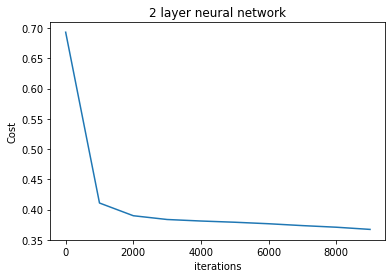

In [199]:
import matplotlib.pyplot as plt


x=iterations
y=costs
plt.plot(x,y)


y_ticks = [0.7,0.65,0.6,0.55,0.5,0.45,0.4,0.35]
plt.yticks(y_ticks)
plt.xlabel('iterations')
plt.ylabel('Cost')
plt.title("2 layer neural network")
plt.show()